# Prediction of Rice Production on Sumatra Island, Indonesia
Pulau Sumatera mempunyai lebih dari 50 persen lahan pertanian setiap provinsinya dengan komoditas pangan utama paling dominan adalah padi, sedangkan sisanya adalah jagung, kacang tanah, dan ubi. Hasil pertanian di Sumatera sangat rentan terhadap perubahan iklim karena dapat memengaruhi pola tanam, waktu tanam, produksi dan kualitas hasil. Perubahan iklim dapat memberikan dampak negatif terhadap produksi bahan pokok tersebut. Apalagi bertambahnya suhu bumi akibat dampak dari pemanasan global yang akan mempengaruhi pola presipitasi, evaporasi, water-run off, kelembaban tanah, dan variasi iklim yang sangat fluktuatif secara keseluruhan dapat mengancam keberhasilan hasil produksi pertanian. Prediksi hasil pertanian komoditas bahan pangan banyak dipengaruhi oleh perubahan cuaca (climate change). Untuk mendukung Sustainable Development Goals dunia, kita sebagai data scientist perlu membangun model prediktif dari masalah yang disebutkan. Regresi yang digunakan adalah metode supervised learning dari decision tree dan Artificial neural network.

Pengambilan data diperoleh melalui website BPS pada kategori tanaman pangan utama dari 8 provinsi di pulau Sumatera yaitu Nanggroe Aceh Darussalam (NAD), Sumatera Utara, Riau, Jambi, Sumatera Selatan, Bengkulu dan Lampung. Data yang digunakan adalah data dari tahun 1993 hingga tahun 2020 untuk dataset padi. Data memuat hasil produksi tahunan dan luas panen atau luas lahan. Kemudian data perubahan cuaca diperoleh melalui website BMKG untuk data harian curah hujan, kelembapan, dan temperatur rata-rata atau suhu rata-rata dari tahun 1993 hingga tahun 2020.

# Goal of this Analytic
Tujuan dari Analisis ini adalah untuk memprediksi produksi beras di Pulau Sumatera berdasarkan akumulasi data selama 28 tahun sebelumnya.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv('Data_Tanaman_Padi_Sumatera_version_1.csv')
data

,Provinsi,Tahun,Produksi,Luas Panen,Curah hujan,Kelembapan,Suhu rata-rata
0,Aceh,1993,1329536.00,323589.00,1627.0,82.00,26.06
1,Aceh,1994,1299699.00,329041.00,1521.0,82.12,26.92
2,Aceh,1995,1382905.00,339253.00,1476.0,82.72,26.27
3,Aceh,1996,1419128.00,348223.00,1557.0,83.00,26.08
4,Aceh,1997,1368074.00,337561.00,1339.0,82.46,26.31
...,...,...,...,...,...,...,...
219,Lampung,2016,3831923.00,390799.00,2317.6,79.40,26.45
220,Lampung,2017,4090654.00,396559.00,1825.1,77.04,26.36
221,Lampung,2018,2488641.91,511940.93,1385.8,76.05,25.50
222,Lampung,2019,2164089.33,464103.42,1706.4,78.03,27.23


Total dataa adalah 224 yang mana untuk setiap provinsi memiliki 28 data tahunan.

Dataset terdiri dari atribut berikut:

Provinsi: Nama provinsi

Tahun : Tahun produksi padi

Produksi: Hasil produksi atau panen tahunan (ton)

Luas Tanah: Luas Pertanian (hektar)

Curah hujan: Jumlah rata-rata curah hujan dalam setahun (milimeter)

Kelembaban: Tingkat kelembaban rata-rata dalam setahun (persentase)

Suhu Rata-Rata: Derajat suhu rata-rata dalam setahun (celsius)

Atribut nomor 1 - 4 dikumpulkan dari Database Badan Pusat Statistik Indonesia, dan atribut lainnya dikumpulkan
dari Database Badan Meteorologi, Klimatologi, dan Geofisika Indonesia

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 224 entries, 0 to 223
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Provinsi        224 non-null    object 
 1   Tahun           224 non-null    int64  
 2   Produksi        224 non-null    float64
 3   Luas Panen      224 non-null    float64
 4   Curah hujan     224 non-null    float64
 5   Kelembapan      224 non-null    float64
 6   Suhu rata-rata  224 non-null    float64
dtypes: float64(5), int64(1), object(1)
memory usage: 12.4+ KB


# Exploratory Data Analysis

In [4]:
data.isnull().sum()

Provinsi          0
Tahun             0
Produksi          0
Luas Panen        0
Curah hujan       0
Kelembapan        0
Suhu rata-rata    0
dtype: int64

In [5]:
data.describe()

,Tahun,Produksi,Luas Panen,Curah hujan,Kelembapan,Suhu rata-rata
count,224.000000,2.240000e+02,224.000000,224.000000,224.000000,224.000000
mean,2006.500000,1.679701e+06,374349.966920,2452.490759,80.948705,26.801964
std,8.095838,1.161387e+06,232751.161987,1031.972625,4.878680,1.197041
min,1993.000000,4.293800e+04,63142.040000,222.500000,54.200000,22.190000
25%,1999.750000,5.488570e+05,146919.500000,1703.525000,78.975000,26.177500
50%,2006.500000,1.667773e+06,373551.500000,2315.700000,82.375000,26.730000
75%,2013.250000,2.436851e+06,514570.250000,3039.700000,84.000000,27.200000
max,2020.000000,4.881089e+06,872737.000000,5522.000000,90.600000,29.850000


Hasil rata-rata di 8 provinsi selama 28 tahun adalah 1679700.887 ton dengan hasil terendah 42938 ton dan tertinggi 4881089 ton. Rata-rata luas lahan pertanian adalah 374350 hektar.

Dari uraian data di atas terlihat bahwa nilai rata-rata dan median dari masing-masing atribut tidak jauh berbeda. Sehingga dapat dikatakan bahwa data tersebut berdistribusi normal.

C:\Users\ASUS\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


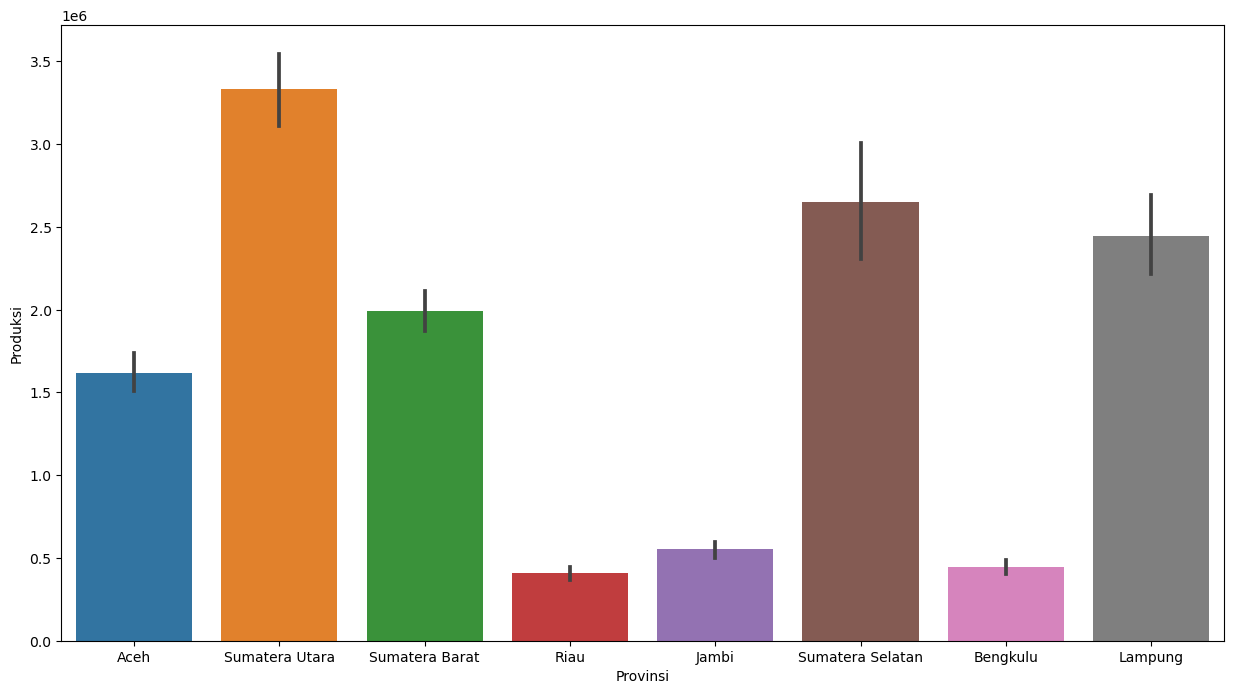

In [6]:
plt.figure(figsize=(15,8))
sns.barplot(data['Provinsi'],data['Produksi'])
plt.show()

Sumatera Utara memiliki produksi hasil tertinggi dalam dataset ini.

In [7]:
pd.pivot_table(data,index=['Provinsi'],values=['Produksi'], aggfunc=np.mean)

,Produksi
Provinsi,
Aceh,1.618737e+06
Bengkulu,4.449648e+05
Jambi,5.528638e+05
Lampung,2.444068e+06
Riau,4.074645e+05
Sumatera Barat,1.990396e+06
Sumatera Selatan,2.648643e+06
Sumatera Utara,3.330471e+06


C:\Users\ASUS\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


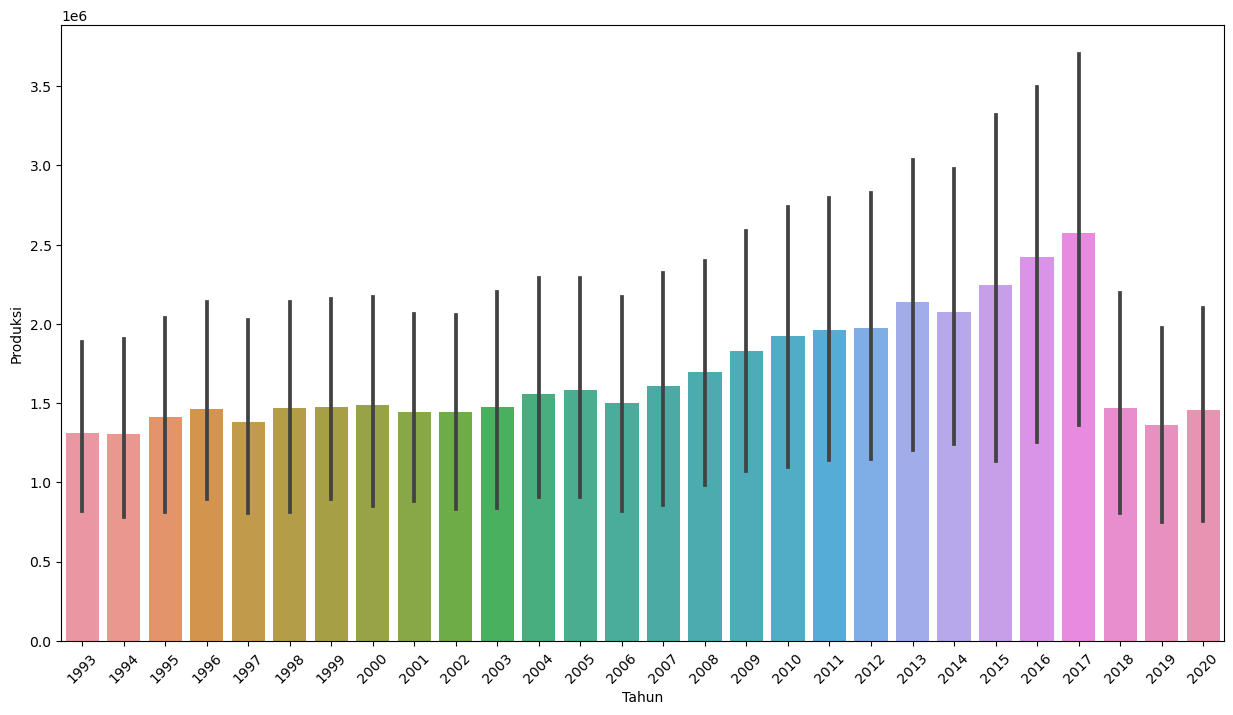

In [8]:
plt.figure(figsize=(15,8))
sns.barplot('Tahun','Produksi',data=data)
plt.xticks(rotation=45)
plt.show()

Tahun dengan produksi terbesar terjadi pada tahun 2017, namun pada tahun-tahun berikutnya produksi mengalami penurunan yang cukup signifikan.

C:\Users\ASUS\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


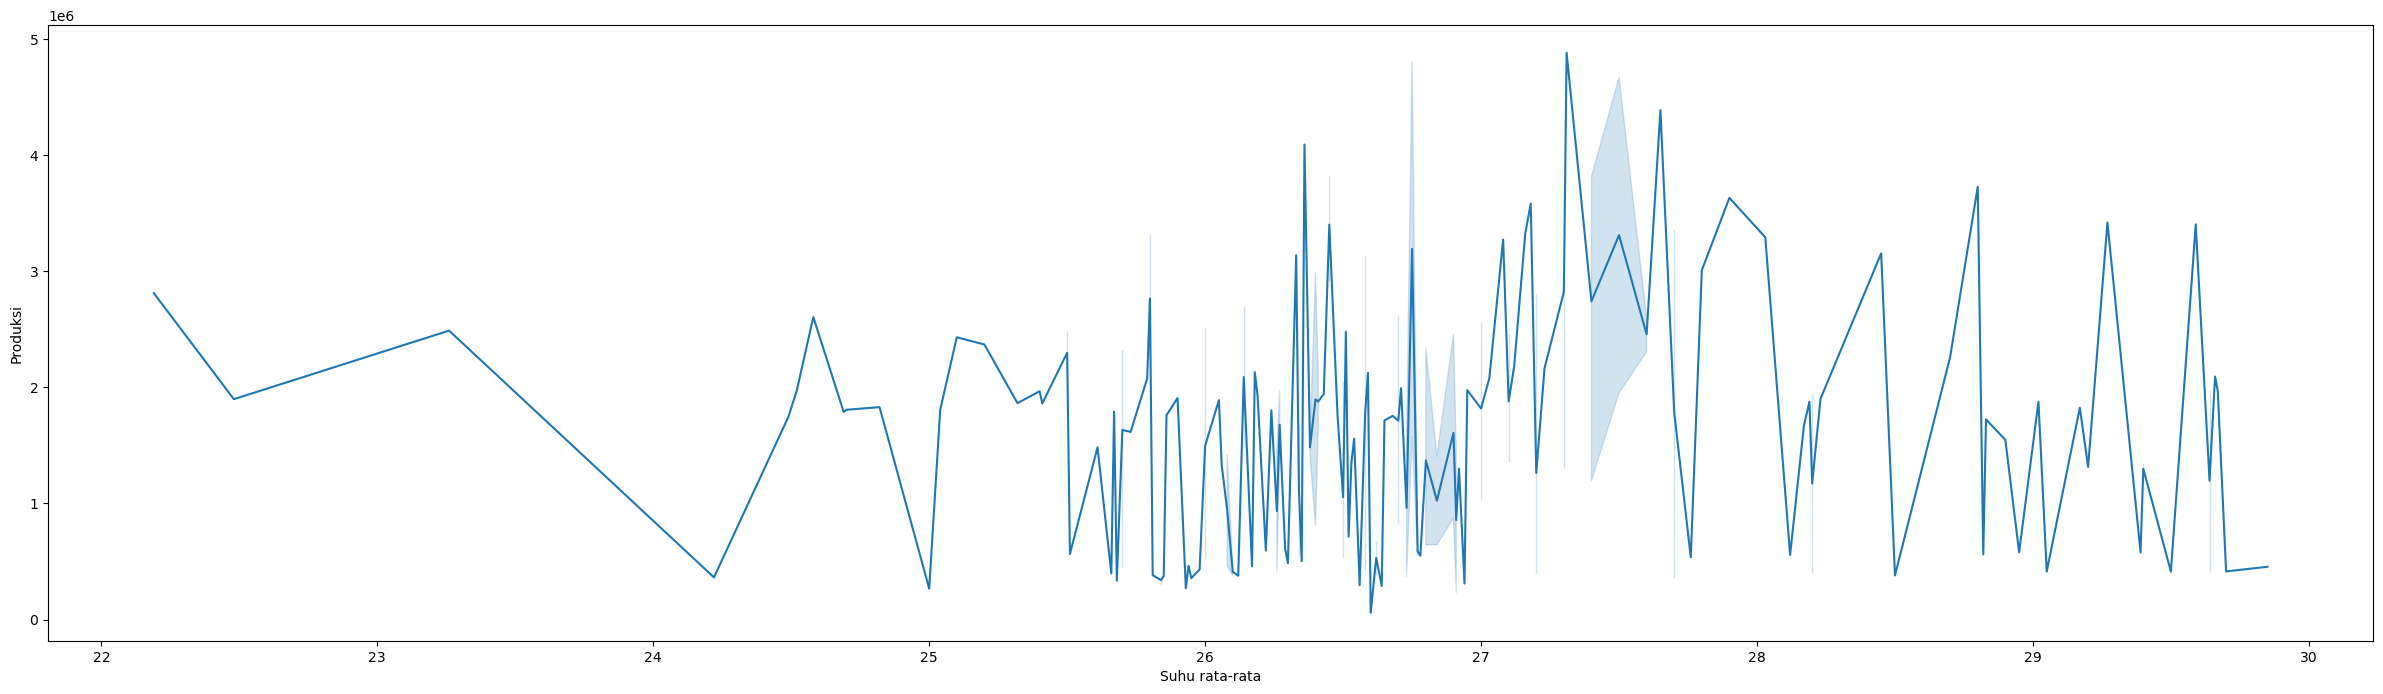

In [9]:
plt.figure(figsize=(30,8))
sns.lineplot(data['Suhu rata-rata'],data['Produksi'])
plt.show()


Produksi maksimal terjadi saat suhu rata-rata berada di kisaran 27-28 derajat Celcius.

C:\Users\ASUS\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


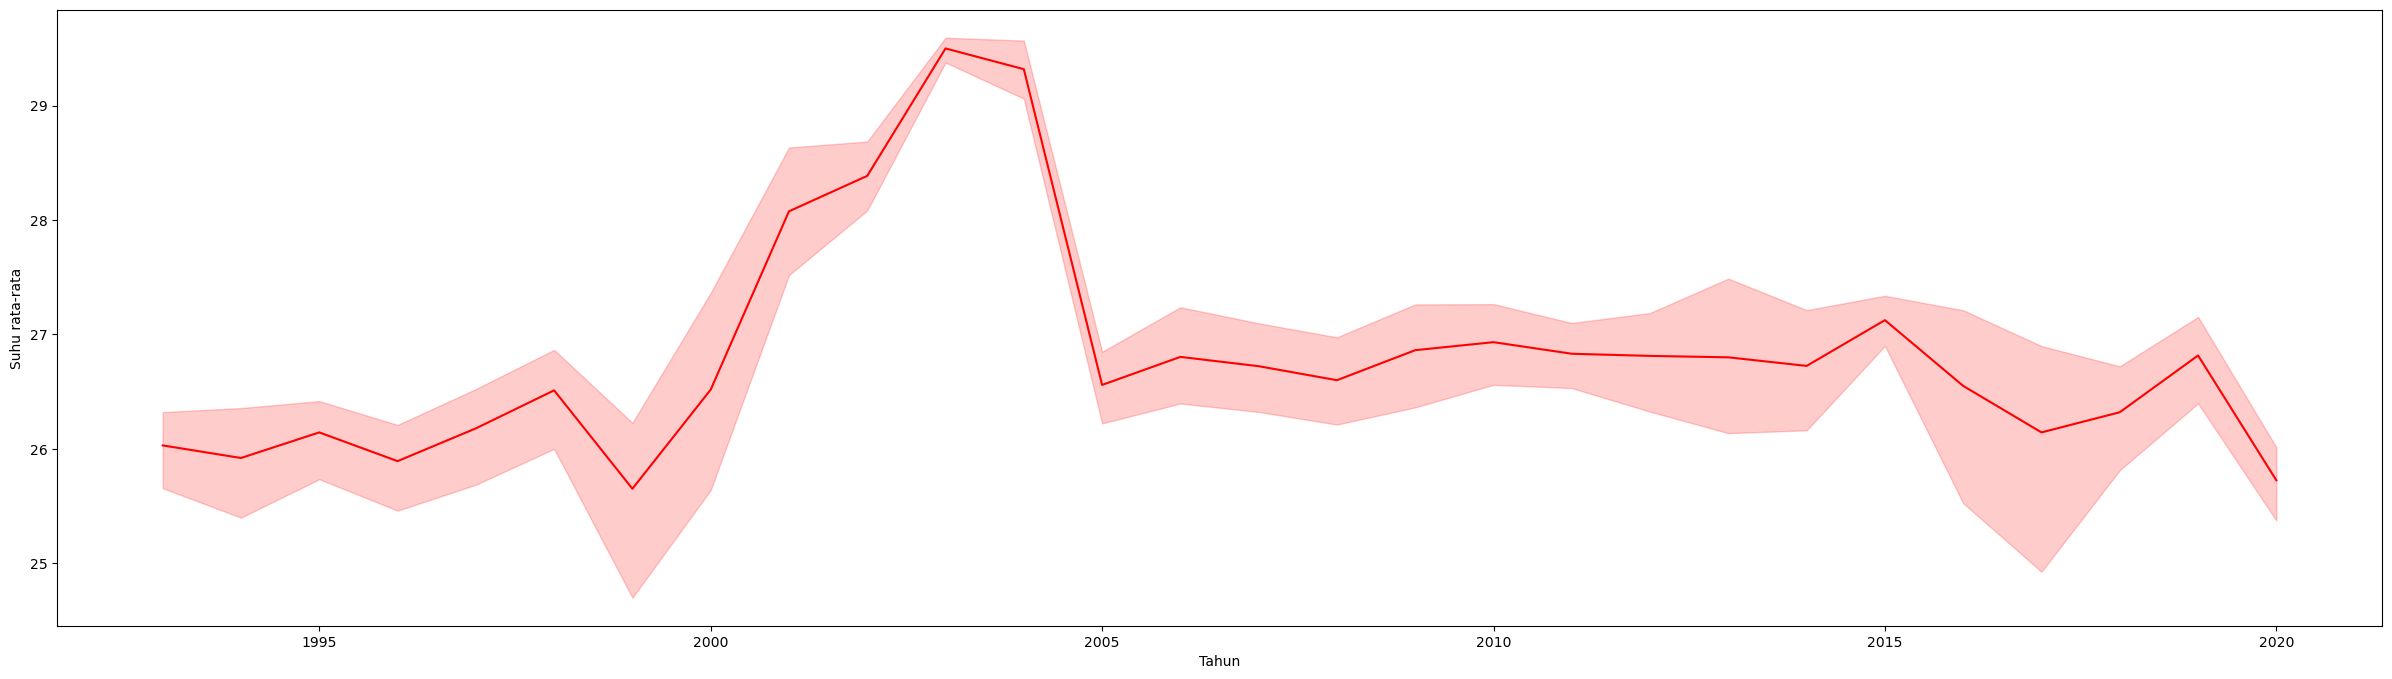

In [10]:
plt.figure(figsize=(30,8))
sns.lineplot(data['Tahun'],data['Suhu rata-rata'], color='red')
plt.show()

Suhu rata-rata tertinggi pernah dicapai pada tahun 2000-2005 yaitu lebih dari 29 derajat Celcius, namun pada tahun-tahun berikutnya cenderung stabil pada kisaran suhu 27 derajat Celcius.

C:\Users\ASUS\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


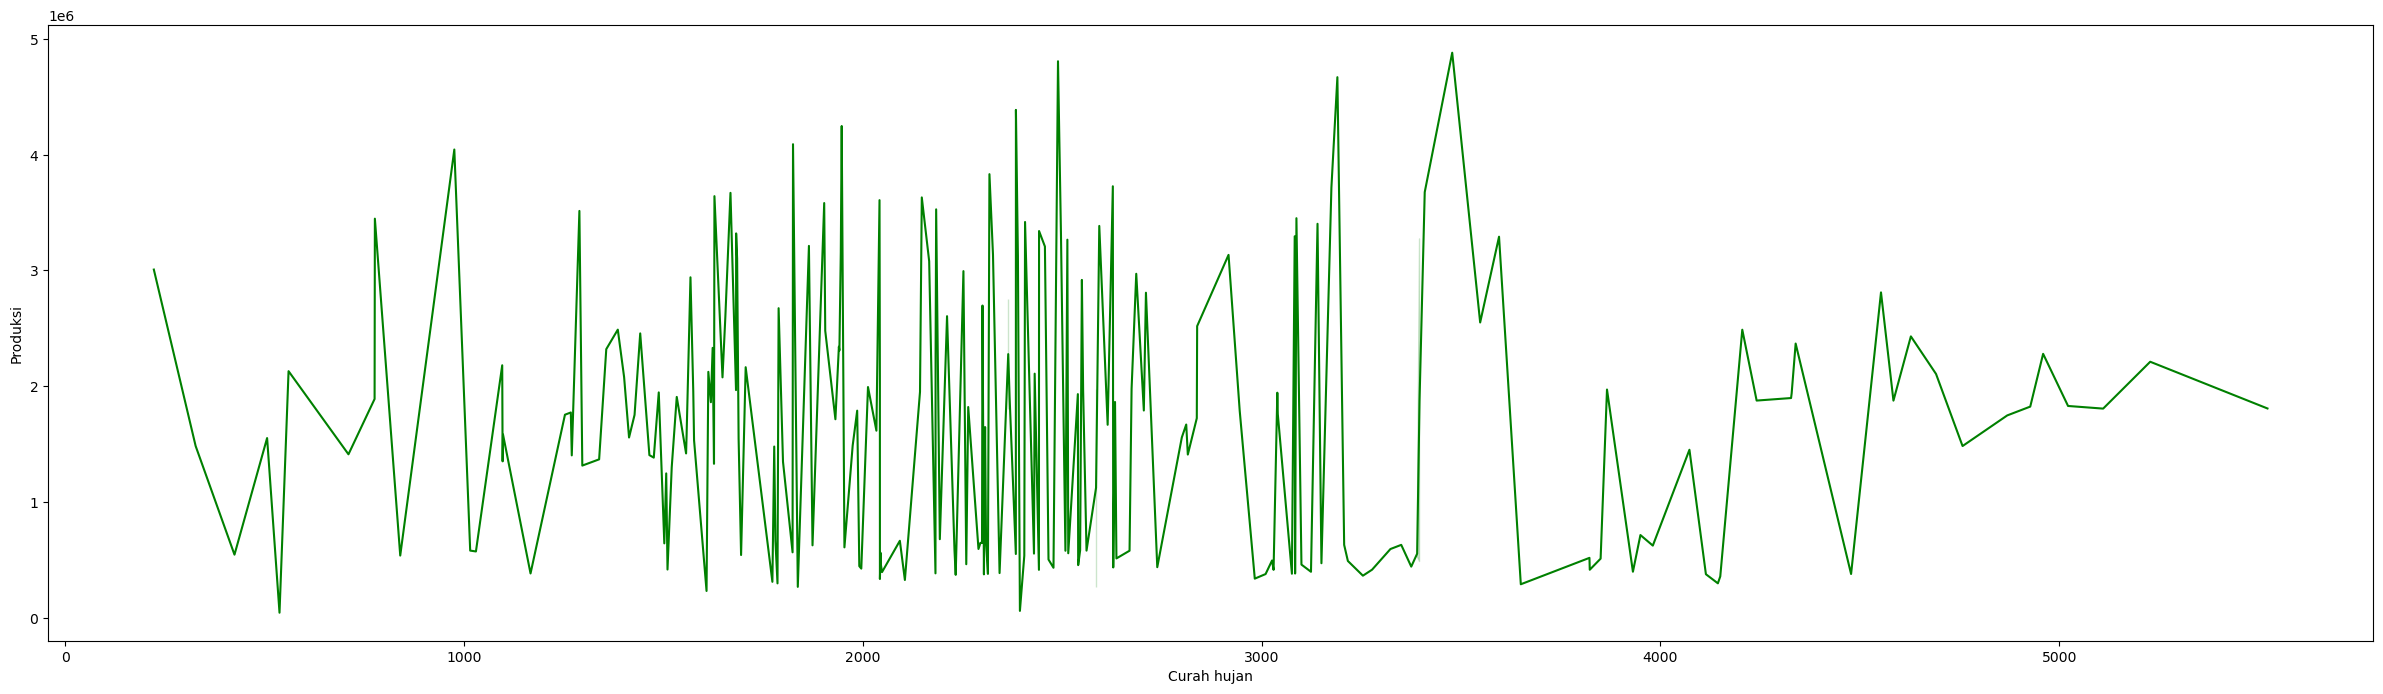

In [11]:
plt.figure(figsize=(30,8))
sns.lineplot(data['Curah hujan'], data['Produksi'], color='green')
plt.show()


Dapat dikatakan bahwa produksi dapat lebih stabil pada curah hujan kondisi sedang, yaitu sekitar 2500mm per tahun.

C:\Users\ASUS\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


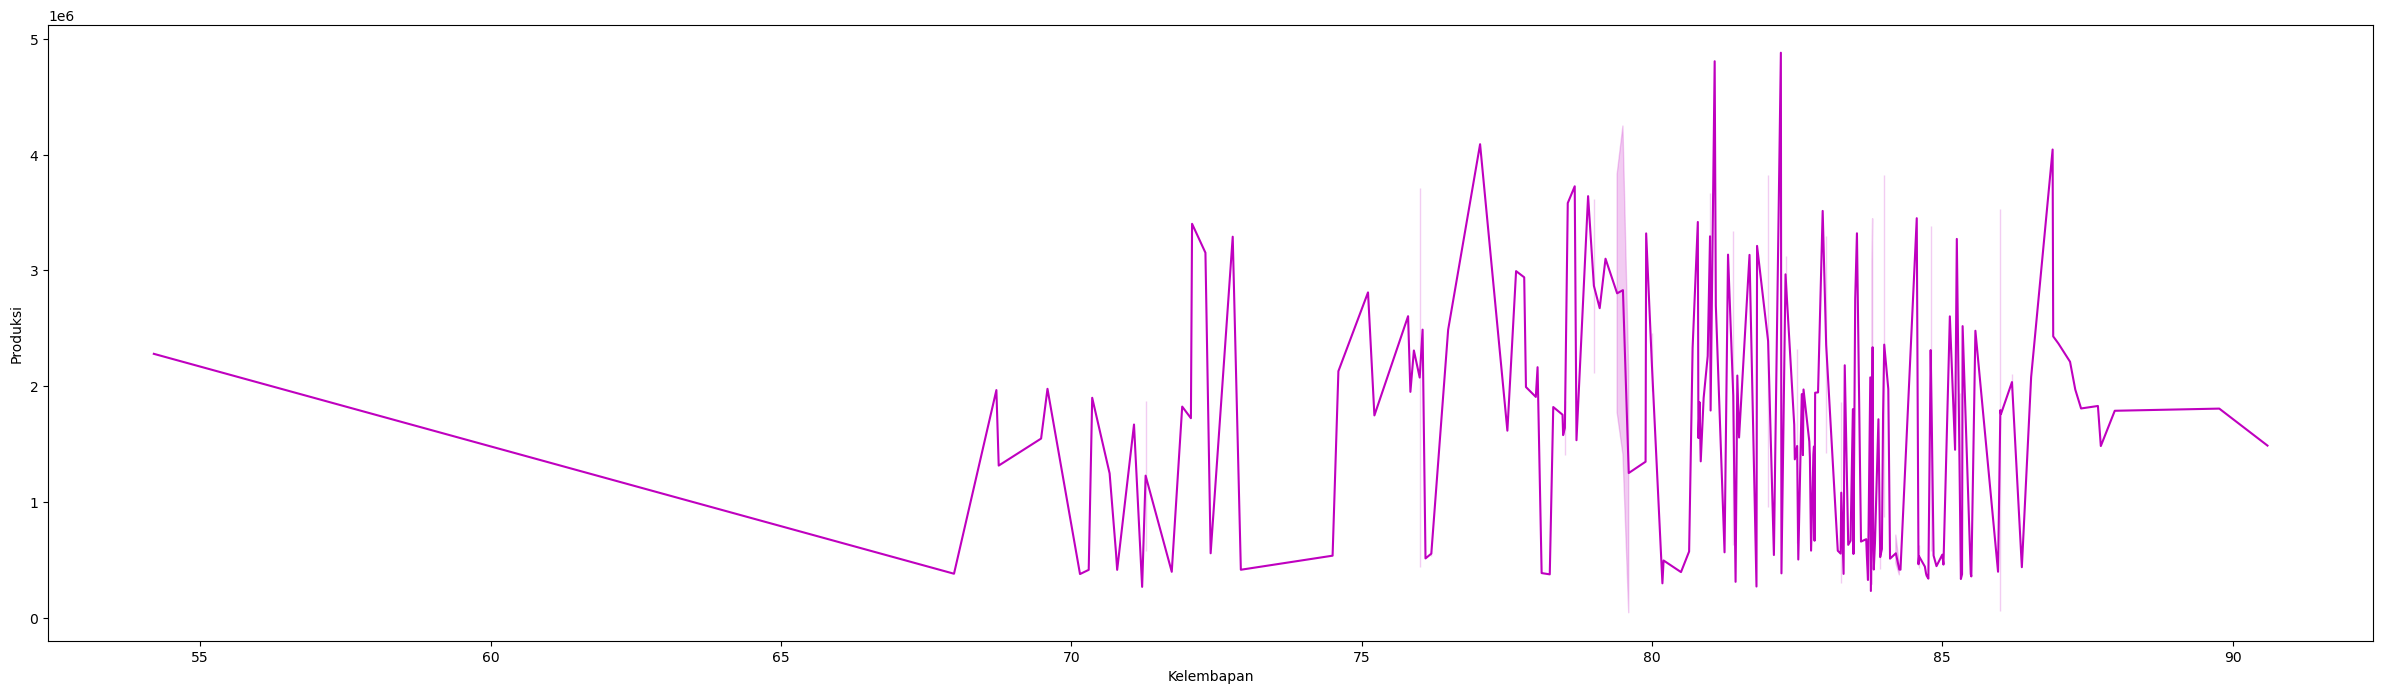

In [12]:
plt.figure(figsize=(30,8))
sns.lineplot(data['Kelembapan'], data['Produksi'], color='m')
plt.show()


Pada tingkat kelembapan sekitar 80-85%, produksi terlihat lebih optimal dan stabil.


Berdasarkan tujuan penelitian ini, maka atribut yang akan menjadi output adalah panen (kolom = Produksi).

# A. Distribution of production quantities

In [13]:
import scipy.stats as stats
import pylab as py

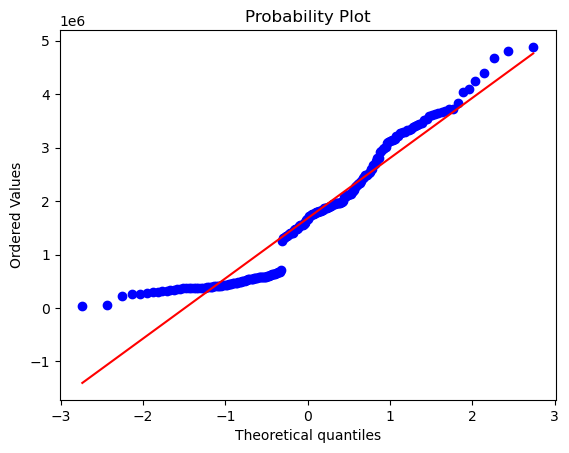

In [14]:
stats.probplot(data['Produksi'], dist='norm', plot=py)
py.show()

QQ-plot di atas menunjukkan bagaimana distribusi data dari variabel terpilih yaitu variabel Produksi. Plot di atas merupakan plot nilai kuantil teoritis dengan nilai kuantil dari variabel yang dipilih. Jadi, plot akan menggambarkan berapa banyak nilai dalam suatu distribusi berada di atas atau di bawah batas tertentu. Dari hasil plot di atas diperoleh garis-garis yang cenderung lurus yang berarti bahwa secara keseluruhan sebaran data variabel-variabel tersebut cenderung normal.

# B. Checking the Outlier

<AxesSubplot:>

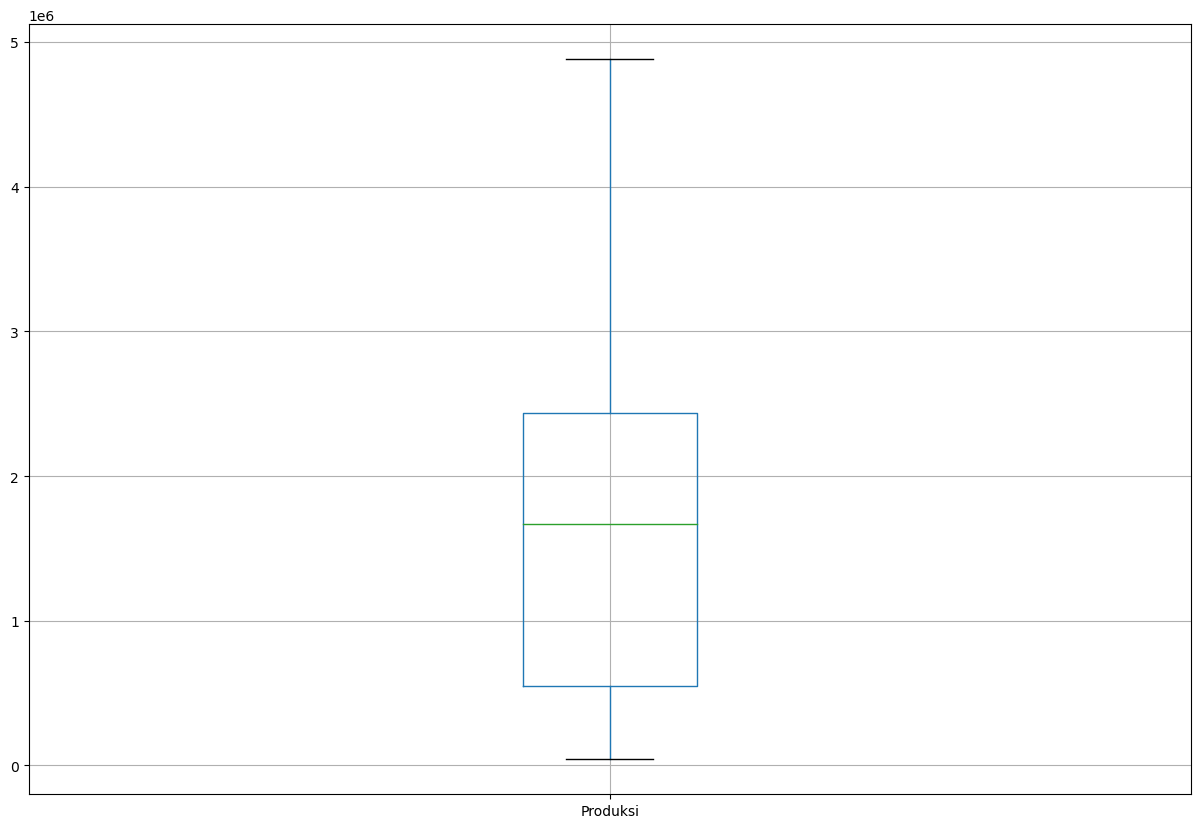

In [15]:
data[['Produksi']].boxplot(figsize=(15,10))


Dari hasil visualisasi vertical boxplot di atas terlihat bahwa tidak terdapat outlier dari variabel output yaitu Produksi.

In [16]:
cols = list(data.columns)

df = data.copy()
df = df[cols[0:2] + cols[3:7] + [cols[2]]]
df.tail()

,Provinsi,Tahun,Luas Panen,Curah hujan,Kelembapan,Suhu rata-rata,Produksi
219,Lampung,2016,390799.00,2317.6,79.40,26.45,3831923.00
220,Lampung,2017,396559.00,1825.1,77.04,26.36,4090654.00
221,Lampung,2018,511940.93,1385.8,76.05,25.50,2488641.91
222,Lampung,2019,464103.42,1706.4,78.03,27.23,2164089.33
223,Lampung,2020,545149.05,2211.3,75.80,24.58,2604913.29


Note;

Korelasi >= 0,5 terdapat hubungan yang koheren antar variabel

Korelasi < 0,5 tidak ada hubungan yang erat antar variabel

In [17]:
df.corr()

,Tahun,Luas Panen,Curah hujan,Kelembapan,Suhu rata-rata,Produksi
Tahun,1.000000,-0.045951,-0.047645,-0.033474,0.004923,0.182527
Luas Panen,-0.045951,1.000000,-0.092975,-0.061121,0.115726,0.905622
Curah hujan,-0.047645,-0.092975,1.000000,0.056466,-0.228699,-0.042129
Kelembapan,-0.033474,-0.061121,0.056466,1.000000,-0.407799,-0.052316
Suhu rata-rata,0.004923,0.115726,-0.228699,-0.407799,1.000000,0.041160
Produksi,0.182527,0.905622,-0.042129,-0.052316,0.041160,1.000000


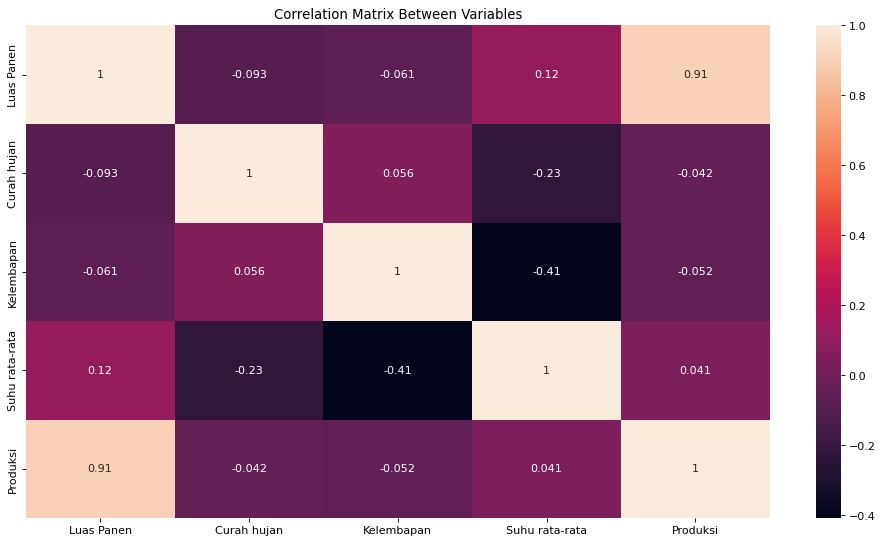

In [18]:
fig, ax = plt.subplots(figsize=(15,8), dpi=80)
sns.heatmap(df.loc[:, 'Luas Panen':'Produksi'].corr(), cmap='rocket', annot=True)
plt.title('Correlation Matrix Between Variables')
plt.show()

Dari matriks korelasi dapat diketahui jenis korelasi antara variabel independen dengan variabel output.

Luas lahan pertanian dan suhu rata-rata memiliki nilai korelasi yang positif, artinya semakin besar nilai variabel bebas tersebut maka produksi juga akan meningkat walaupun mungkin tidak signifikan (pengaruh suhu).

Sedangkan variabel curah hujan dan kelembaban memiliki nilai korelasi yang negatif, artinya semakin kecil kedua variabel tersebut maka produksi akan meningkat (pergerakan grafik bergerak terbalik), meskipun hubungannya tidak terlalu kuat.

# Data Preprocessing (Feature Engineering )

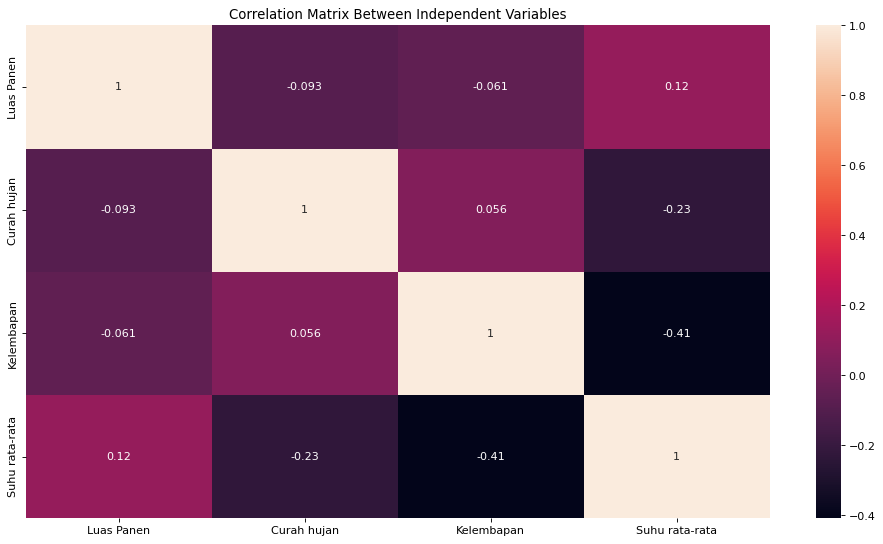

In [19]:
fig, ax = plt.subplots(figsize=(15,8), dpi=80)
sns.heatmap(df.loc[:, 'Luas Panen':'Suhu rata-rata'].corr(), cmap='rocket', annot=True)
plt.title('Correlation Matrix Between Independent Variables')
plt.show()

Multikolinearitas adalah keadaan yang menunjukkan adanya korelasi atau hubungan yang kuat antara dua atau lebih variabel independen dalam suatu model regresi yang akan mempengaruhi stabilitas dan akurasi model. Salah satu cara untuk mendeteksi adanya multikolinearitas dalam model regresi adalah dengan melihat kekuatan korelasi antar variabel independen. Jika terdapat korelasi antar variabel independen > 0,8 maka dapat mengindikasikan adanya multikolinearitas.

Jadi, dari matriks di atas dapat disimpulkan bahwa tidak ditemukan adanya multikolinearitas.

In [20]:
#one hot encoding
from sklearn.preprocessing import OneHotEncoder
string_feat = ['Provinsi']
ohe = OneHotEncoder()
ohe.fit(df[string_feat])
data_ohe_res = pd.DataFrame(ohe.transform(df[string_feat]).toarray(),
                          columns=ohe.get_feature_names_out())
df = pd.concat([df, data_ohe_res], axis=1)
df = df.drop(columns=string_feat)
df.head()

,Tahun,Luas Panen,Curah hujan,Kelembapan,Suhu rata-rata,Produksi,Provinsi_Aceh,Provinsi_Bengkulu,Provinsi_Jambi,Provinsi_Lampung,Provinsi_Riau,Provinsi_Sumatera Barat,Provinsi_Sumatera Selatan,Provinsi_Sumatera Utara
0,1993,323589.0,1627.0,82.00,26.06,1329536.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1994,329041.0,1521.0,82.12,26.92,1299699.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1995,339253.0,1476.0,82.72,26.27,1382905.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1996,348223.0,1557.0,83.00,26.08,1419128.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1997,337561.0,1339.0,82.46,26.31,1368074.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# Feature Selection

In [21]:
df = df.drop(columns='Tahun')
df.tail()

,Luas Panen,Curah hujan,Kelembapan,Suhu rata-rata,Produksi,Provinsi_Aceh,Provinsi_Bengkulu,Provinsi_Jambi,Provinsi_Lampung,Provinsi_Riau,Provinsi_Sumatera Barat,Provinsi_Sumatera Selatan,Provinsi_Sumatera Utara
219,390799.00,2317.6,79.40,26.45,3831923.00,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
220,396559.00,1825.1,77.04,26.36,4090654.00,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
221,511940.93,1385.8,76.05,25.50,2488641.91,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
222,464103.42,1706.4,78.03,27.23,2164089.33,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
223,545149.05,2211.3,75.80,24.58,2604913.29,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [22]:
#drop feature target
x = df.drop('Produksi',axis=1)
y = df[['Produksi']]

# Train & Test Split

In [23]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3, random_state=0)
print('x_train :',x_train.shape)
print('x_test :',x_test.shape)
print('y_train :',y_train.shape)
print('y_test :',y_test.shape)

x_train : (156, 12)
x_test : (68, 12)
y_train : (156, 1)
y_test : (68, 1)


In [24]:
x_train[:5]

,Luas Panen,Curah hujan,Kelembapan,Suhu rata-rata,Provinsi_Aceh,Provinsi_Bengkulu,Provinsi_Jambi,Provinsi_Lampung,Provinsi_Riau,Provinsi_Sumatera Barat,Provinsi_Sumatera Selatan,Provinsi_Sumatera Utara
166,539316.52,1655.5,85.13,27.60,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
40,822073.00,776.7,83.80,27.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
13,320789.00,506.5,80.80,26.73,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
122,159463.00,2508.1,71.28,29.39,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
89,126280.00,2233.0,84.26,26.73,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [25]:
y_test.tail()

,Produksi
186,502552.0
61,1807622.0
52,4669777.5
66,1823739.0
26,1714437.6


# Feature Scaling 

Kumpulan data berisi fitur yang sangat bervariasi dalam besaran, satuan, dan jangkauan. Fitur dengan magnitudo tinggi akan lebih berat dalam perhitungan jarak daripada fitur dengan magnitudo rendah.

Untuk menekan efek ini, kita perlu membawa semua fitur ke tingkat magnitudo yang sama. Ini dapat dicapai dengan penskalaan.

In [26]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.fit_transform(x_test)
y_train = sc.fit_transform(y_train)
y_test = sc.fit_transform(y_test)

In [27]:
np.set_printoptions(suppress=True)
print(x_train[:5])
print(y_train[:5])

[[ 0.71669991 -0.83956692  0.93754178  0.69231249 -0.36115756 -0.40519021
  -0.38348249 -0.36115756 -0.37240587 -0.37240587  2.76887462 -0.40519021]
 [ 1.92735709 -1.70505807  0.63626219  0.20923176 -0.36115756 -0.40519021
  -0.38348249 -0.36115756 -0.37240587 -0.37240587 -0.36115756  2.46797672]
 [-0.21895294 -1.97116607 -0.04331584 -0.00815457  2.76887462 -0.40519021
  -0.38348249 -0.36115756 -0.37240587 -0.37240587 -0.36115756 -0.40519021]
 [-0.90969035  0.00012102 -2.19984345  2.13350335 -0.36115756 -0.40519021
   2.60768096 -0.36115756 -0.37240587 -0.37240587 -0.36115756 -0.40519021]
 [-1.05176751 -0.27081277  0.74046415 -0.00815457 -0.36115756 -0.40519021
  -0.38348249 -0.36115756  2.68524232 -0.37240587 -0.36115756 -0.40519021]]
[[ 0.77273334]
 [ 1.48736091]
 [-0.11743608]
 [-0.94191188]
 [-1.11821706]]


In [28]:
print(x_train.min())
print(x_train.max())

-3.6634654470384587
2.7688746209726918


In [29]:
print(x_test[:5])
print(y_test[:5])

[[-1.07170771 -0.31302577  0.53326331 -0.34207301 -0.4152274  -0.31108551
  -0.36514837 -0.4152274   2.56038192 -0.39056673 -0.4152274  -0.31108551]
 [ 0.51064077 -0.79631917  0.34793546  1.18107828 -0.4152274  -0.31108551
  -0.36514837  2.40831892 -0.39056673 -0.39056673 -0.4152274  -0.31108551]
 [-1.2012385  -0.26857953  0.77401631 -1.18826817 -0.4152274   3.21455025
  -0.36514837 -0.4152274  -0.39056673 -0.39056673 -0.4152274  -0.31108551]
 [-1.23204632 -0.12562823  0.49169445 -0.30446434 -0.4152274  -0.31108551
   2.73861279 -0.4152274  -0.39056673 -0.39056673 -0.4152274  -0.31108551]
 [-1.11782994  0.78499627  0.58002828 -0.51131204 -0.4152274   3.21455025
  -0.36514837 -0.4152274  -0.39056673 -0.39056673 -0.4152274  -0.31108551]]
[[-1.11263695]
 [ 0.26419173]
 [-1.19391204]
 [-0.88288197]
 [-1.07069477]]


# Modeling

In [30]:
from sklearn.metrics import r2_score
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

# Linear Regression

In [31]:
from sklearn.linear_model import LinearRegression
LinReg = LinearRegression()
LinReg.fit(x_train, y_train)

LinearRegression()

In [32]:
ypred_LinReg = sc.inverse_transform(LinReg.predict(x_test).reshape(-1,1))   #lakukan invers untuk mengembalikan ke nilai semula (karena sudah distandarkan sebelumnya)
y_pred_LinReg = pd.DataFrame(ypred_LinReg)
y_pred_LinReg.tail()

,0
63,3.111825e+05
64,2.076688e+06
65,2.727175e+06
66,1.934337e+06
67,1.553306e+06


C:\Users\ASUS\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\ASUS\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


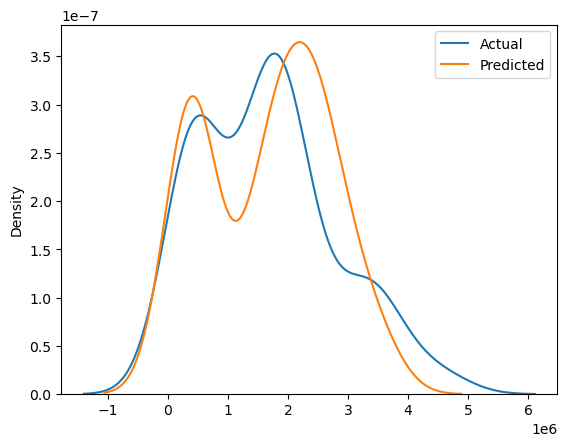

In [33]:
#visualize the prediction
sns.distplot(sc.inverse_transform(y_test), hist=False, label='Actual')
sns.distplot(y_pred_LinReg, hist=False, label='Predicted')
plt.legend()

In [34]:
#C#Periksa keakuratan pengujian dan pelatihan model Regresi Linier
print('Linear Regression')
LinReg_train = LinReg.score(x_train,y_train)*100
LinReg_test = LinReg.score(x_test, y_test)*100

#Menilai kinerja metode Regresi Linier dengan membagi data sampel sebanyak 10 kali lipat secara acak
LinReg_cv = KFold(n_splits=10, random_state=0, shuffle=True)
LinReg_score = cross_val_score(LinReg,x,y,cv=LinReg_cv)

print('Train : ',LinReg_train)
print('Test  : ',LinReg_test, '\n')
print('The Average Cross Validation Score is',np.round(np.mean(LinReg_score)*100,2))

Linear Regression
Train :  84.68578496928782
Test  :  86.37276105524145 

The Average Cross Validation Score is 82.9


# Hyperparameter Tuning

In [35]:
LinReg.get_params()

{'copy_X': True,
 'fit_intercept': True,
 'n_jobs': None,
 'normalize': 'deprecated',
 'positive': False}

In [36]:
param_grid = dict(
    copy_X=[True, False],
    fit_intercept=[True, False],
    n_jobs=np.arange(1,11), 
    positive=[True, False],
)

LinReg_tuning = LinearRegression()

LinReg_search = GridSearchCV(estimator=LinReg_tuning,
                           param_grid=param_grid,
                           scoring='r2')

LinReg_best_model = LinReg_search.fit(x_train, y_train)
print('Optimum parameters', LinReg_best_model.best_params_)
print('Best score is {}'.format(LinReg_best_model.best_score_))

Optimum parameters {'copy_X': True, 'fit_intercept': False, 'n_jobs': 1, 'positive': True}
Best score is 0.8387472527255266


# Fit New Model

In [37]:
from sklearn.linear_model import LinearRegression
LinReg_model = LinearRegression(copy_X= True, fit_intercept= False, n_jobs= 1, positive= True)
LinReg_model.fit(x_train, y_train)

LinearRegression(fit_intercept=False, n_jobs=1, positive=True)

In [38]:
ypred_LinReg_model = sc.inverse_transform(LinReg_model.predict(x_test).reshape(-1,1))
ypred_LinReg_model = pd.DataFrame(ypred_LinReg_model)
ypred_LinReg_model.tail()

,0
63,4.556448e+05
64,2.049707e+06
65,2.917382e+06
66,1.980058e+06
67,1.487799e+06


C:\Users\ASUS\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\ASUS\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


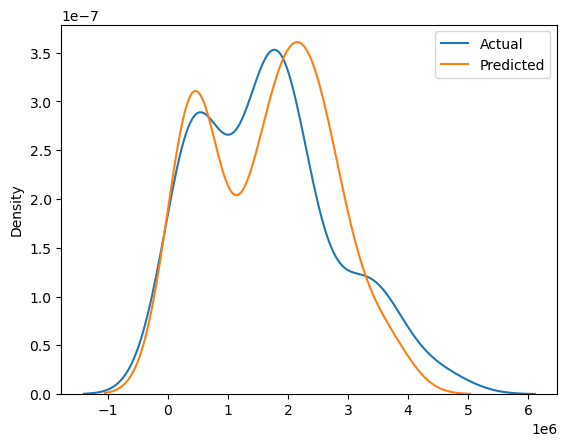

In [39]:
#visualize the prediction
sns.distplot(sc.inverse_transform(y_test),hist=False,label='Actual')
sns.distplot(ypred_LinReg_model,hist=False,label='Predicted')
plt.legend()

In [40]:
#Check the accuracy of testing and training of the Linear Regression model
print('Linear Regression')
LinReg_model_train = LinReg_model.score(x_train,y_train)*100
LinReg_model_test = LinReg_model.score(x_test, y_test)*100

#Assess the performance of the Linear Regression method by dividing the sample data by 10 folds randomly
LinReg_model_cv = KFold(n_splits=10, random_state=0, shuffle=True)
LinReg_model_score = cross_val_score(LinReg_model,x,y,cv=LinReg_model_cv)

print('Train : ',LinReg_model_train)
print('Test  : ',LinReg_model_test, '\n')
print('The Average Cross Validation Score is',np.round(np.mean(LinReg_model_score)*100,2))

Linear Regression
Train :  84.6508189494205
Test  :  86.89566591106708 

The Average Cross Validation Score is 83.0



Model baru Regresi Linier telah meningkat sedikit setelah penyetelan hyperparameter.

# Random Forest Regression

Random Forest Regressor adalah algoritma untuk pemodelan regresi yang digunakan untuk memprediksi nilai berkelanjutan.

In [41]:
from sklearn.ensemble import RandomForestRegressor
RFReg = RandomForestRegressor(n_estimators=200, max_depth=5, random_state=0)
RFReg.fit(x_train, y_train.ravel())

RandomForestRegressor(max_depth=5, n_estimators=200, random_state=0)

In [42]:
ypred_RFReg = sc.inverse_transform(RFReg.predict(x_test).reshape(-1,1))
y_pred_RFReg = pd.DataFrame(ypred_RFReg)
y_pred_RFReg.tail()

,0
63,4.490402e+05
64,1.875380e+06
65,2.600398e+06
66,1.951832e+06
67,2.114010e+06


C:\Users\ASUS\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\ASUS\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


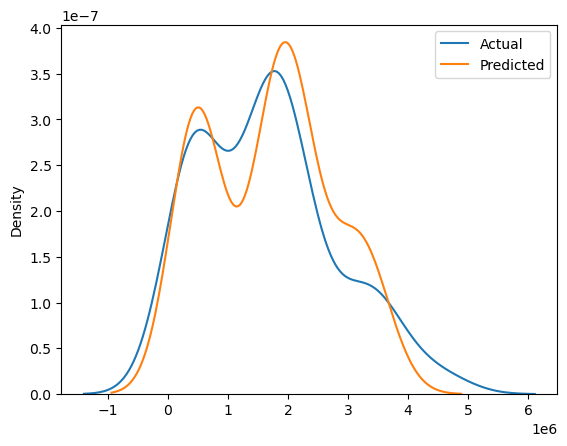

In [43]:
#visualize the prediction
sns.distplot(sc.inverse_transform(y_test),hist=False,label='Actual')
sns.distplot(y_pred_RFReg,hist=False,label='Predicted')
plt.legend()

In [44]:
#Check the accuracy of testing and training of the Random Forest Regression model
print('Random Forest Regression')
RFReg_train = RFReg.score(x_train,y_train.ravel())*100
RFReg_test = RFReg.score(x_test, y_test)*100

#Assess the performance of the Random Forest Regression method by dividing the sample data by 10 folds randomly
RFReg_cv = KFold(n_splits=10, random_state=0, shuffle=True)
RFReg_score = cross_val_score(RFReg,x,y,cv=RFReg_cv)

print('Train : ',RFReg_train)
print('Test  : ',RFReg_test, '\n')
print('The Average Cross Validation Score is',np.round(np.mean(RFReg_score)*100,2))

Random Forest Regression


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was pa

Train :  95.23971349396201
Test  :  85.48007246824575 

The Average Cross Validation Score is 83.81


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


# Hyperparameter Tuning

In [45]:
RFReg.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': 5,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 200,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 0,
 'verbose': 0,
 'warm_start': False}

In [46]:
#Fit New Model
RFReg_model = RandomForestRegressor(n_estimators=227, max_depth=9, min_samples_split=2, min_samples_leaf=1, random_state=0)
RFReg_model.fit(x_train, y_train.ravel())

RandomForestRegressor(max_depth=9, n_estimators=227, random_state=0)

In [47]:
ypred_RFReg_model = sc.inverse_transform(RFReg_model.predict(x_test).reshape(-1,1))
ypred_RFReg_model = pd.DataFrame(ypred_RFReg_model)
ypred_RFReg_model.tail()

,0
63,4.374426e+05
64,1.874739e+06
65,2.709860e+06
66,1.895373e+06
67,2.136797e+06


C:\Users\ASUS\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\ASUS\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


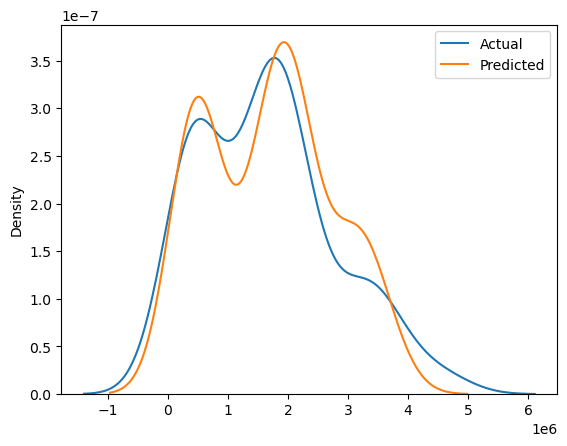

In [48]:
#visualize the prediction
sns.distplot(sc.inverse_transform(y_test),hist=False,label='Actual')
sns.distplot(ypred_RFReg_model,hist=False,label='Predicted')
plt.legend()

In [49]:
# Periksa keakuratan pengujian dan pelatihan model Random Forest Regression

In [50]:
print ('Random Forest Regression')
RFReg_model_train = RFReg_model.score(x_train,y_train)*100
RFReg_model_test = RFReg_model.score(x_test, y_test)*100



Random Forest Regression


In [53]:
#Menilai kinerja metode Random Forest Regression dengan membagi data sampel dengan 10 kali lipat secara acak
RFReg_model_Cv = KFold(n_splits=10,random_state=0, shuffle=True)
RFReg_model_score = cross_val_score(LinReg_model,x,y,cv=LinReg_model_cv)

print('Train : ', RFReg_model_train)
print('Test : ', RFReg_model_test,'\n')
print('The Average Cross Validation Score is', np.round(np.mean(RFReg_model_score)*100,2))

Train :  97.47517414251053
Test :  86.37724010302279 

The Average Cross Validation Score is 83.0


Model Random Forest Regression berkinerja lebih baik setelah menerapkan beberapa parameter yang disetel.

# Support Vector Regression 
SVR memberikan fleksibilitas untuk menentukan berapa banyak kesalahan yang dapat diterima dalam model dan akan menemukan garis yang sesuai (atau hyperplane dalam dimensi yang lebih tinggi) agar sesuai dengan data.

In [73]:
from sklearn.svm import SVR
SVReg = SVR(gamma = 1)
SVReg.fit(x_train, y_train.ravel())

SVR(gamma=1)

In [74]:
ypred_SVReg = sc.inverse_transform(SVReg.predict(x_test).reshape(-1,1))
y_pred_SVReg = pd.DataFrame(ypred_SVReg)
y_pred_SVReg.tail()

,0
63,1.086560e+06
64,1.757398e+06
65,1.915177e+06
66,1.690874e+06
67,1.815422e+06


C:\Users\ASUS\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\ASUS\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


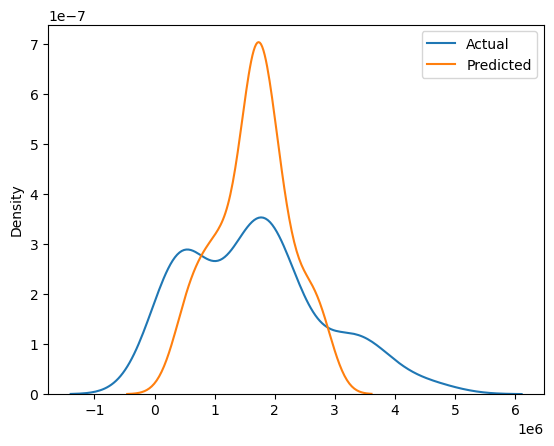

In [75]:
sns.distplot(sc.inverse_transform(y_test),hist=False,label='Actual')
sns.distplot(y_pred_SVReg,hist=False,label='Predicted')
plt.legend()

In [76]:
print('Support Vector Regression')
SVReg_train = SVReg.score(x_train,y_train.ravel())*100
SVReg_test = SVReg.score(x_test, y_test)*100

SVReg_cv = KFold(n_splits=10, random_state=0, shuffle=True)
SVReg_score = cross_val_score(SVReg,x,y,cv=SVReg_cv)

print('Train : ',SVReg_train)
print('Test  : ',SVReg_test, '\n')
print('The Average Cross Validation Score is',np.round(np.mean(SVReg_score)*100,2))

Support Vector Regression
Train :  92.62509041219276
Test  :  60.81422434326274 

The Average Cross Validation Score is -7.15


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for 

# Hyperparameter Tuning 

In [77]:
SVReg.get_params()

{'C': 1.0,
 'cache_size': 200,
 'coef0': 0.0,
 'degree': 3,
 'epsilon': 0.1,
 'gamma': 1,
 'kernel': 'rbf',
 'max_iter': -1,
 'shrinking': True,
 'tol': 0.001,
 'verbose': False}

In [78]:
param_grid = {'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'C': [0.1, 1, 10, 100, 1000],
              'epsilon': [0.001, 0.01, 0.1]}             

SVReg_tuning = SVR()

SVReg_search = GridSearchCV(SVReg_tuning, param_grid, cv = 10, scoring='r2')

SVReg_best_model = SVReg_search.fit(x_train, y_train.ravel())
print('Optimum parameters', SVReg_best_model.best_params_)
print('Best score is {}'.format(SVReg_best_model.best_score_))

Optimum parameters {'C': 1, 'epsilon': 0.1, 'gamma': 0.1}
Best score is 0.8410602764707769


# Fit New Model

In [79]:
SVReg_model = SVR(C= 1, epsilon= 0.1, gamma= 0.1)
SVReg_model.fit(x_train, y_train.ravel())

SVR(C=1, gamma=0.1)

In [80]:
ypred_SVReg_model = sc.inverse_transform(SVReg_model.predict(x_test).reshape(-1,1))
ypred_SVReg_model = pd.DataFrame(ypred_SVReg_model)
ypred_SVReg_model.tail()

,0
63,5.679776e+05
64,1.665946e+06
65,2.256916e+06
66,1.687524e+06
67,1.495696e+06


C:\Users\ASUS\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\ASUS\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


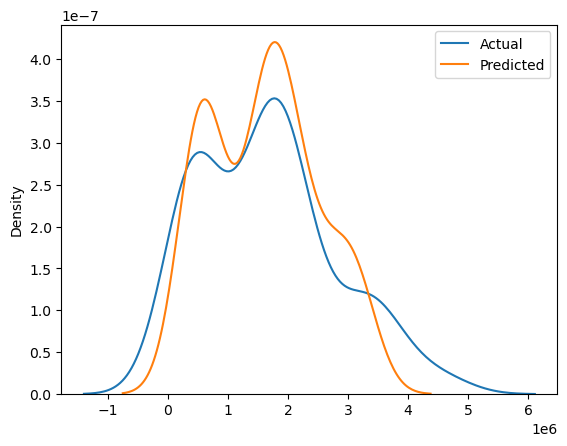

In [81]:
sns.distplot(sc.inverse_transform(y_test),hist=False,label='Actual')
sns.distplot(ypred_SVReg_model,hist=False,label='Predicted')
plt.legend()

In [82]:
print('Support Vector Regression')
SVReg_model_train = SVReg_model.score(x_train,y_train.ravel())*100
SVReg_model_test = SVReg_model.score(x_test, y_test)*100


SVReg_model_cv = KFold(n_splits=10, random_state=0, shuffle=True)
SVReg_model_score = cross_val_score(SVReg,x,y,cv=SVReg_model_cv)

print('Train : ',SVReg_model_train)
print('Test  : ',SVReg_model_test, '\n')
print('The Average Cross Validation Score is',np.round(np.mean(SVReg_model_score)*100,2))

Support Vector Regression
Train :  87.44905125649252
Test  :  84.19387590969212 

The Average Cross Validation Score is -7.15


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for 

Model regresi vektor dukungan telah menurunkan keakuratannya dalam data train tetapi meningkat dalam pengujian, yang berarti overfitting telah diminimalkan.

# Decision Tree Regression 
Decision Tree Regressor adalah algoritma untuk membangun model regresi yang mengamati fitur dari suatu objek dan melatih model dalam struktur pohon.

In [84]:
from sklearn.tree import DecisionTreeRegressor
DTreeReg = DecisionTreeRegressor(random_state = 0)
DTreeReg.fit(x_train, y_train)

DecisionTreeRegressor(random_state=0)

In [85]:
ypred_DTreeReg = sc.inverse_transform(DTreeReg.predict(x_test).reshape(-1,1))
y_pred_DTreeReg = pd.DataFrame(ypred_DTreeReg)
y_pred_DTreeReg.tail()

,0
63,4.256516e+05
64,1.916811e+06
65,1.826944e+06
66,1.827549e+06
67,2.392152e+06


C:\Users\ASUS\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\ASUS\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


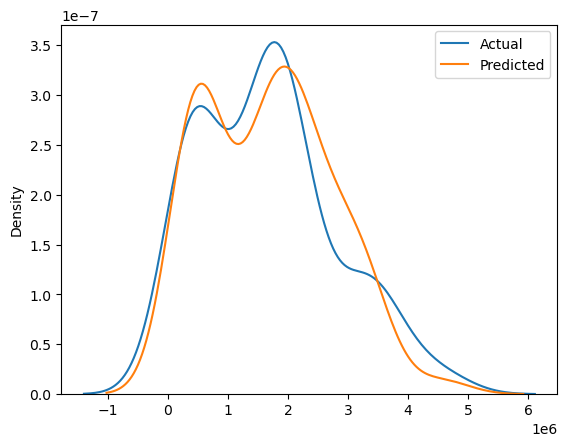

In [86]:
sns.distplot(sc.inverse_transform(y_test),hist=False,label='Actual')
sns.distplot(y_pred_DTreeReg,hist=False,label='Predicted')
plt.legend()

In [87]:
print('Decision Tree Regression')
DTreeReg_train = DTreeReg.score(x_train,y_train)*100
DTreeReg_test = DTreeReg.score(x_test, y_test)*100


DTreeReg_cv = KFold(n_splits=10, random_state=0, shuffle=True)
DTreeReg_score = cross_val_score(DTreeReg,x,y,cv=DTreeReg_cv)

print('Train : ',DTreeReg_train)
print('Test  : ',DTreeReg_test, '\n')
print('The Average Cross Validation Score is',np.round(np.mean(DTreeReg_score)*100,2))

Decision Tree Regression
Train :  100.0
Test  :  73.21934331853251 

The Average Cross Validation Score is 64.39


# Hyperparameter Tuning 

In [88]:
DTreeReg.get_params()

{'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': 0,
 'splitter': 'best'}

In [89]:
DTreeReg_model = DecisionTreeRegressor(splitter= 'best', min_samples_split= 8, min_samples_leaf= 5, max_features= 'auto', max_depth= 2, random_state= 0)
DTreeReg_model.fit(x_train, y_train)

DecisionTreeRegressor(max_depth=2, max_features='auto', min_samples_leaf=5,
                      min_samples_split=8, random_state=0)

In [90]:
ypred_DTreeReg_model = sc.inverse_transform(DTreeReg_model.predict(x_test).reshape(-1,1))
ypred_DTreeReg_model = pd.DataFrame(ypred_DTreeReg_model)
ypred_DTreeReg_model.tail()

,0
63,4.849200e+05
64,1.966208e+06
65,1.966208e+06
66,1.966208e+06
67,1.966208e+06


C:\Users\ASUS\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\ASUS\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


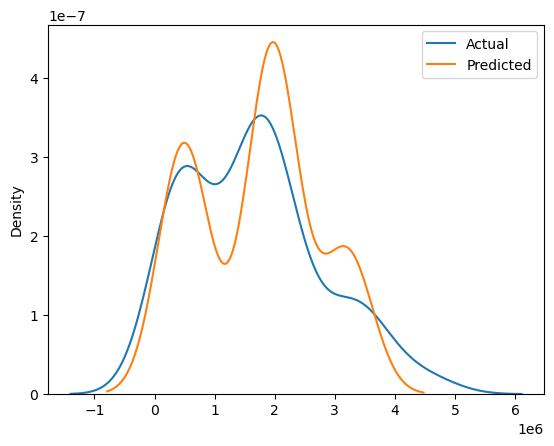

In [91]:
sns.distplot(sc.inverse_transform(y_test),hist=False,label='Actual')
sns.distplot(ypred_DTreeReg_model,hist=False,label='Predicted')
plt.legend()

In [93]:
print('Decision Tree Regression')
DTreeReg_model_train = DTreeReg_model.score(x_train,y_train)*100
DTreeReg_model_test = DTreeReg_model.score(x_test, y_test)*100

#Assess the performance of the Decision Tree Regression method by dividing the sample data by 10 folds randomly
DTreeReg_model_cv = KFold(n_splits=10, random_state=0, shuffle=True)
DTreeReg_model_score = cross_val_score(DTreeReg_model,x,y,cv=DTreeReg_model_cv)

print('Train : ',DTreeReg_model_train)
print('Test  : ',DTreeReg_model_test, '\n')
print('The Average Cross Validation Score is',np.round(np.mean(DTreeReg_model_score)*100,2))

Decision Tree Regression
Train :  84.68468800789897
Test  :  81.42164309777542 

The Average Cross Validation Score is 78.52



Model regresi Decision Tree yang telah menggunakan hasil tuning hyperparameter menunjukkan kinerja yang lebih seimbang antara data train dan data test.

# K-Neighbors Regression
KNN Regressor adalah algoritma untuk membangun model regresi yang menggunakan nilai rata-rata atau median dari Kneighbors untuk memprediksi elemen target.

In [94]:
from sklearn.neighbors import KNeighborsRegressor
KNNReg = KNeighborsRegressor(n_neighbors=1)
KNNReg.fit(x_train, y_train)

KNeighborsRegressor(n_neighbors=1)

In [95]:
ypred_KNNReg = sc.inverse_transform(KNNReg.predict(x_test).reshape(-1,1))
y_pred_KNNReg = pd.DataFrame(ypred_KNNReg)
y_pred_KNNReg.tail()

,0
63,4.256516e+05
64,1.783884e+06
65,4.178500e+06
66,1.826944e+06
67,1.455769e+06


C:\Users\ASUS\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\ASUS\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


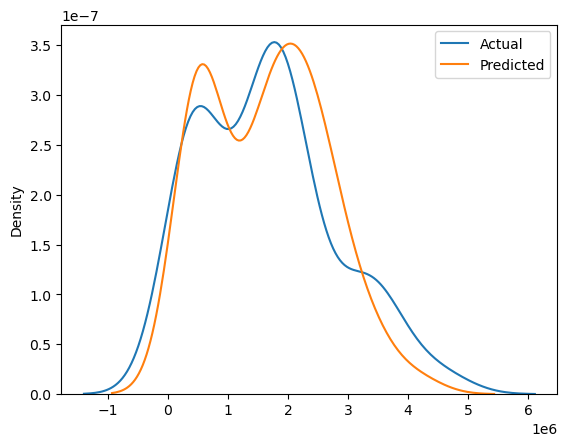

In [96]:
sns.distplot(sc.inverse_transform(y_test),hist=False,label='Actual')
sns.distplot(y_pred_KNNReg,hist=False,label='Predicted')
plt.legend()

In [97]:
print('K-Nearest Neighbors Regression')
KNNReg_train = KNNReg.score(x_train,y_train)*100
KNNReg_test = KNNReg.score(x_test, y_test)*100

#Assess the performance of the K-Nearest Neighbor Regression method by dividing the sample data by 10 folds randomly
KNNReg_cv = KFold(n_splits=10, random_state=0, shuffle=True)
KNNReg_score = cross_val_score(KNNReg,x,y,cv=KNNReg_cv)

print('Train : ',KNNReg_train)
print('Test  : ',KNNReg_test, '\n')
print('The Average Cross Validation Score is',np.round(np.mean(KNNReg_score)*100,2))

K-Nearest Neighbors Regression
Train :  100.0
Test  :  86.62185171553706 

The Average Cross Validation Score is 71.02


# Hyper Parameter Tuning

In [98]:
KNNReg.get_params()

{'algorithm': 'auto',
 'leaf_size': 30,
 'metric': 'minkowski',
 'metric_params': None,
 'n_jobs': None,
 'n_neighbors': 1,
 'p': 2,
 'weights': 'uniform'}

In [99]:
param_grid = {'n_neighbors': np.arange(1, 10)}

KNNReg_tuning = KNeighborsRegressor()

KNNReg_search = GridSearchCV(KNNReg_tuning, param_grid, cv=10, scoring='r2')

KNNReg_best_model = KNNReg_search.fit(x_train, y_train)
print('Optimum parameters', KNNReg_best_model.best_params_)
print('Best score is {}'.format(KNNReg_best_model.best_score_))

Optimum parameters {'n_neighbors': 3}
Best score is 0.8140455477131845


# Fit New Model

In [100]:
KNNReg_model = KNeighborsRegressor(n_neighbors= 3)
KNNReg_model.fit(x_train, y_train)

KNeighborsRegressor(n_neighbors=3)

In [101]:
ypred_KNNReg_model = sc.inverse_transform(KNNReg_model.predict(x_test).reshape(-1,1))
ypred_KNNReg_model = pd.DataFrame(ypred_KNNReg_model)
ypred_KNNReg_model.tail()

,0
63,4.901651e+05
64,1.896004e+06
65,3.117505e+06
66,2.037919e+06
67,1.721345e+06


C:\Users\ASUS\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\ASUS\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


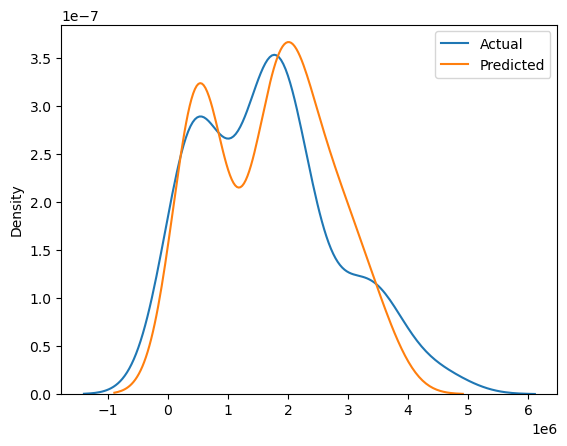

In [102]:
sns.distplot(sc.inverse_transform(y_test),hist=False,label='Actual')
sns.distplot(ypred_KNNReg_model,hist=False,label='Predicted')
plt.legend()

In [103]:
print('K-Nearest Neighbors Regression')
KNNReg_model_train = KNNReg_model.score(x_train,y_train)*100
KNNReg_model_test = KNNReg_model.score(x_test, y_test)*100


KNNReg_model_cv = KFold(n_splits=10, random_state=0, shuffle=True)
KNNReg_model_score = cross_val_score(KNNReg_model,x,y,cv=KNNReg_model_cv)

print('Train : ',KNNReg_model_train)
print('Test  : ',KNNReg_model_test, '\n')
print('The Average Cross Validation Score is',np.round(np.mean(KNNReg_model_score)*100,2))

K-Nearest Neighbors Regression
Train :  89.6868897055617
Test  :  86.28672507954892 

The Average Cross Validation Score is 77.2


Setelah penyetelan hyperparameter, model baru tidak lagi cenderung overfit.

Evaluasi di bawah ini dilakukan dengan menggunakan mean absolute error, mean squared error, dan r2-score. Semakin kecil mean absolute error dan mean squared error, tetapi semakin besar R2-score, semakin baik algoritma tersebut.

Skor-R2 (koefisien determinasi) fungsi skor regresi akan mewakili proporsi varian untuk item (tanaman) dalam model regresi. Skor R2 menunjukkan seberapa cocok istilah (titik data) dengan kurva atau garis.

Mean absolute error (MAE) merepresentasikan rata-rata perbedaan absolut antara nilai aktual dan prediksi dalam kumpulan data. Ini mengukur rata-rata residu dalam kumpulan data.

Mean Squared Error (MSE) mewakili rata-rata selisih kuadrat antara nilai asli dan prediksi dalam kumpulan data. Ini mengukur varian dari residu.

In [104]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

In [106]:
results= pd.DataFrame(columns=['R2-score','Mean Absolute Error','Mean Squared Error'])
results.loc['Linear Regression']=[r2_score(sc.inverse_transform(y_test),ypred_LinReg_model)*100,
                                  mean_absolute_error(sc.inverse_transform(y_test),ypred_LinReg_model),
                                  mean_squared_error(sc.inverse_transform(y_test),ypred_LinReg_model)]
results.loc['Random Forest']=[r2_score(sc.inverse_transform(y_test),ypred_RFReg_model)*100,
                              mean_absolute_error(sc.inverse_transform(y_test),ypred_RFReg_model),
                              mean_squared_error(sc.inverse_transform(y_test),y_pred_RFReg)]
#results.loc['Gradient Boosting']=[r2_score(sc.inverse_transform(y_test),ypred_GBReg_model)*100,
                                  #mean_absolute_error(sc.inverse_transform(y_test),ypred_GBReg_model),
                                  #mean_squared_error(sc.inverse_transform(y_test),ypred_GBReg_model)]
results.loc['SVR']=[r2_score(sc.inverse_transform(y_test),ypred_SVReg_model)*100,
                    mean_absolute_error(sc.inverse_transform(y_test),ypred_SVReg_model),
                    mean_squared_error(sc.inverse_transform(y_test),ypred_SVReg_model)]
results.loc['Decision Tree']=[r2_score(sc.inverse_transform(y_test),ypred_DTreeReg_model)*100,
                              mean_absolute_error(sc.inverse_transform(y_test),ypred_DTreeReg_model),
                              mean_squared_error(sc.inverse_transform(y_test),ypred_DTreeReg_model)]
results.loc['K-Neighbors']=[r2_score(sc.inverse_transform(y_test),ypred_KNNReg_model)*100,
                            mean_absolute_error(sc.inverse_transform(y_test),ypred_KNNReg_model),
                            mean_squared_error(sc.inverse_transform(y_test),ypred_KNNReg_model)]

#Sorts models based on R2-score
results.sort_values('R2-score',ascending=False).style.background_gradient(cmap='Purples', subset=['R2-score'])

,R2-score,Mean Absolute Error,Mean Squared Error
Linear Regression,86.895666,261049.168107,160199780301.228760
Random Forest,86.377240,224668.555252,177505334097.156494
K-Neighbors,86.286725,269658.437076,167644049255.577728
SVR,84.193876,284771.942122,193229017933.827148
Decision Tree,81.421643,281254.415963,227119415141.265686


Dari hasil yang dilihat diatas, model dengan algoritma Linear Regression memiliki R2-score tertinggi - 86.9%. Sehingga model ini dapat menjadi pilihan terbaik untuk digunakan dalam memprediksi produksi pertanian di Sumatera sesuai dengan tujuan yang telah dijelaskan sebelumnya.

In [51]:
m./ludml 

SyntaxError: invalid syntax (2793488276.py, line 1)